# Please download those .pkl files in "check PL model" folder on Google drive 

In [1]:
import time 
import sys
from blu import *  
from marginal_plt import *
%matplotlib inline
math_blu = '$\mathcal{B}_{\mathcal{H}_{\mathrm{U}}}^{\mathcal{H}_{\mathrm{L}}}$'

# posterior samples 
with open('./posterior/img1_det_m1qxeff.pkl', 'rb') as f:
    img1=dill.load(f)
with open('./posterior/img2_det_m1qxeff.pkl', 'rb') as f:
    img2=dill.load(f)
# benchmark model
with open('./pop_prior/benchmark_dist.pkl', 'rb') as f:
    pop_true=dill.load(f)


# paramteric form    
mmin = 15.15
mmax = 225.4

sqrt2pi = np.sqrt(2*np.pi)

def pl_mass(x, a, xmin, xmax):
    return x**-a * (1-a)/(xmax**(1-a) - xmin**(1-a))
    
def pl_q(x, a):
    xx = x**-a * (1-a)
    return x**-a * (1-a)

def gaussian(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sqrt2pi*sigma)

def par_model(s, a, b, mu, sigma):
    return pl_mass(s[:,0], a, mmin, mmax)*pl_q(s[:,1], b)*gaussian(s[:,2], mu, sigma)



In [2]:
# only compute the blu within the reliable region of reconstructed astro population function
data=np.load('../Mock_data/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
q= m2/m1
m1z = m1*(1+redshift)
m1z = m1z[:int(m1z.size/2)]
q = q[:int(q.size/2)]
n = m1z.size
index = np.where((m1z<90)*(q>0.3))[0]

BLU-lensed pair: 100%|██████████████████████████████████████████████████████████████████████████| 18/18 [00:26<00:00,  1.45s/it]


Nmodel= 40


dist: 100%|█████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 42.09it/s]


(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:xlabel='$m_1^z [M_{\\odot}]$', ylabel='$\\mathcal{B}_{\\mathcal{H}_{\\mathrm{U}}}^{\\mathcal{H}_{\\mathrm{L}}}$'>)

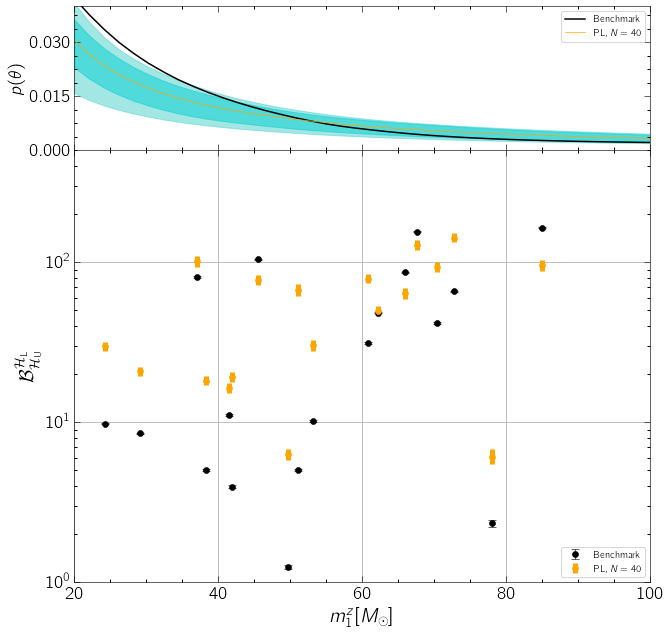

In [5]:
Nmodel = 40


with open('./pop_prior/wrong_model_draws.pkl', 'rb') as f:
    pop_pl=dill.load(f)
pop_pl=pop_pl[:Nmodel]

N = 2e4
OLU_pl = OddsRatio(gw_pop=pop_pl,Nmc=N)
OLU_true = OddsRatio(gw_pop=pop_true,Nmc=N)

blu_true=np.zeros((n,2))
blu_pl=np.zeros((n,2))
for i in tqdm(index[:n], total = int(index[:n].size), desc = 'BLU-lensed pair'):
    blu_true[i]=OLU_true.BayesFactor_PEuniform(img1[i],img2[i])
    blu_pl[i]=OLU_pl.BayesFactor_PEuniform(img1[i],img2[i])

    
ylim=(1e0,5e2)
xlim=[20,100]

plotting_two(m1z[index],blu_true[index], blu_pl[index],pop_pl, pop_true, color='orange', label=r'$\mathrm{PL}'+',N={:d}$'.format(len(pop_pl)),
             xlabel=math_blu,xlim=xlim,ylim=ylim,yscale='log')

#plt.savefig('check_plt/blu_pl_'+str(len(pop_pl))+'.pdf',bbox_inches = 'tight')

BLU-lensed pair: 100%|██████████████████████████████████████████████████████████████████████████| 18/18 [00:26<00:00,  1.49s/it]


Nmodel= 50


dist: 100%|█████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.74it/s]


(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:xlabel='$m_1^z [M_{\\odot}]$', ylabel='$\\mathcal{B}_{\\mathcal{H}_{\\mathrm{U}}}^{\\mathcal{H}_{\\mathrm{L}}}$'>)

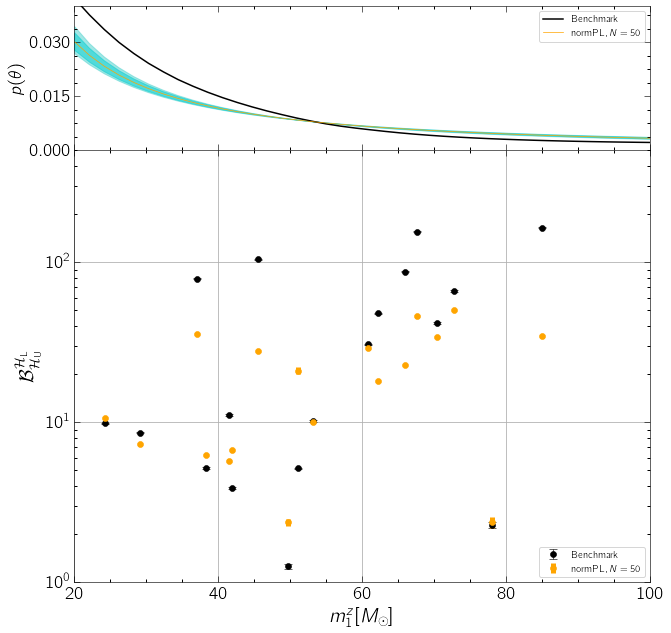

In [7]:
Nmodel = 50

with open('./pop_prior/wrong_model_draws_norm.pkl', 'rb') as f:
    pop_pl=dill.load(f)
pop_pl=pop_pl[:Nmodel]

N = 2e4
OLU_pl = OddsRatio(gw_pop=pop_pl,Nmc=N)
OLU_true = OddsRatio(gw_pop=pop_true,Nmc=N)

blu_true=np.zeros((n,2))
blu_pl=np.zeros((n,2))
for i in tqdm(index[:n], total = int(index[:n].size), desc = 'BLU-lensed pair'):
    blu_true[i]=OLU_true.BayesFactor_PEuniform(img1[i],img2[i])
    blu_pl[i]=OLU_pl.BayesFactor_PEuniform(img1[i],img2[i])

    
ylim=(1e0,5e2)
xlim=[20,100]

plotting_two(m1z[index],blu_true[index], blu_pl[index],pop_pl, pop_true, color='orange', label=r'$\mathrm{norm PL}'+',N={:d}$'.format(len(pop_pl)),
             xlabel=math_blu,xlim=xlim,ylim=ylim,yscale='log')

#plt.savefig('check_plt/blu_normpl_'+str(len(pop_pl))+'.pdf',bbox_inches = 'tight')